In [10]:
!pip install pandas scikit-learn joblib


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib



In [12]:
df = pd.read_csv('voice.csv')
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.27

In [13]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("Classes:", le.classes_)


Classes: ['female' 'male']


In [14]:
X = df.drop(['label','label_encoded'], axis=1)
y = df['label_encoded']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

In [20]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test,y_pred, target_names=le.classes_))


Accuracy: 0.9811
              precision    recall  f1-score   support

      female       0.97      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [21]:
joblib.dump(model, 'gender_model.pkl')
joblib.dump(le, 'gender_label_encoder.pkl')

print("Model and label encoder saved!")

Model and label encoder saved!


In [ ]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

#  Load Dataset
df = pd.read_csv("voice.csv")  # Ensure the dataset is in the same folder


In [ ]:

#  Encode Labels (male/female → 0/1)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # female=0, male=1


In [ ]:

#  Features & Target
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
#  Train-Test Split FIRST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  Normalize AFTER split (to avoid leakage)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:


#  Grid Search for Best SVM Parameters
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

#  Best Model
model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:

#  Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

#  Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#  Save Model and Scaler
joblib.dump(model, "svm_gender_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(" Model and scaler saved successfully.")



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       317
           1       0.99      0.98      0.99       317

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634

Accuracy: 0.9889589905362776
✅ Model and scaler saved successfully.


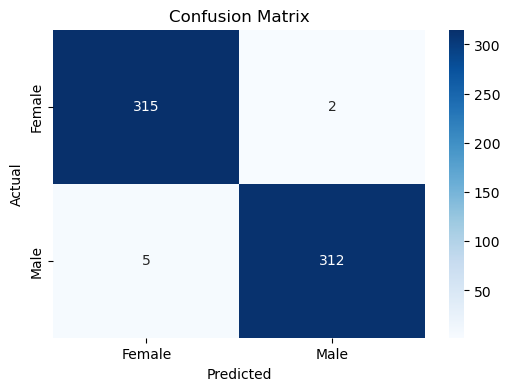

In [33]:

# 🔵 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


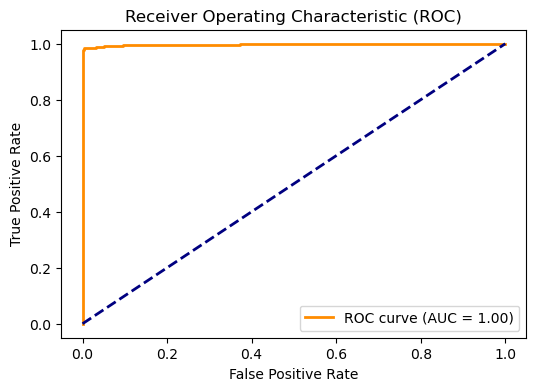

In [ ]:

#  ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.show()


In [ ]:
# Simple SVM Gender Classification with Fine-Tuning
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('voice.csv')

# Encode labels
y = LabelEncoder().fit_transform(df['label'])
X = df.drop('label', axis=1)

# Split and scale
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print('Best Parameters:', grid.best_params_)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

VOICE GENDER CLASSIFICATION WITH SVM
Loading voice gender dataset...
Dataset shape: (3168, 21)
Columns: ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   f

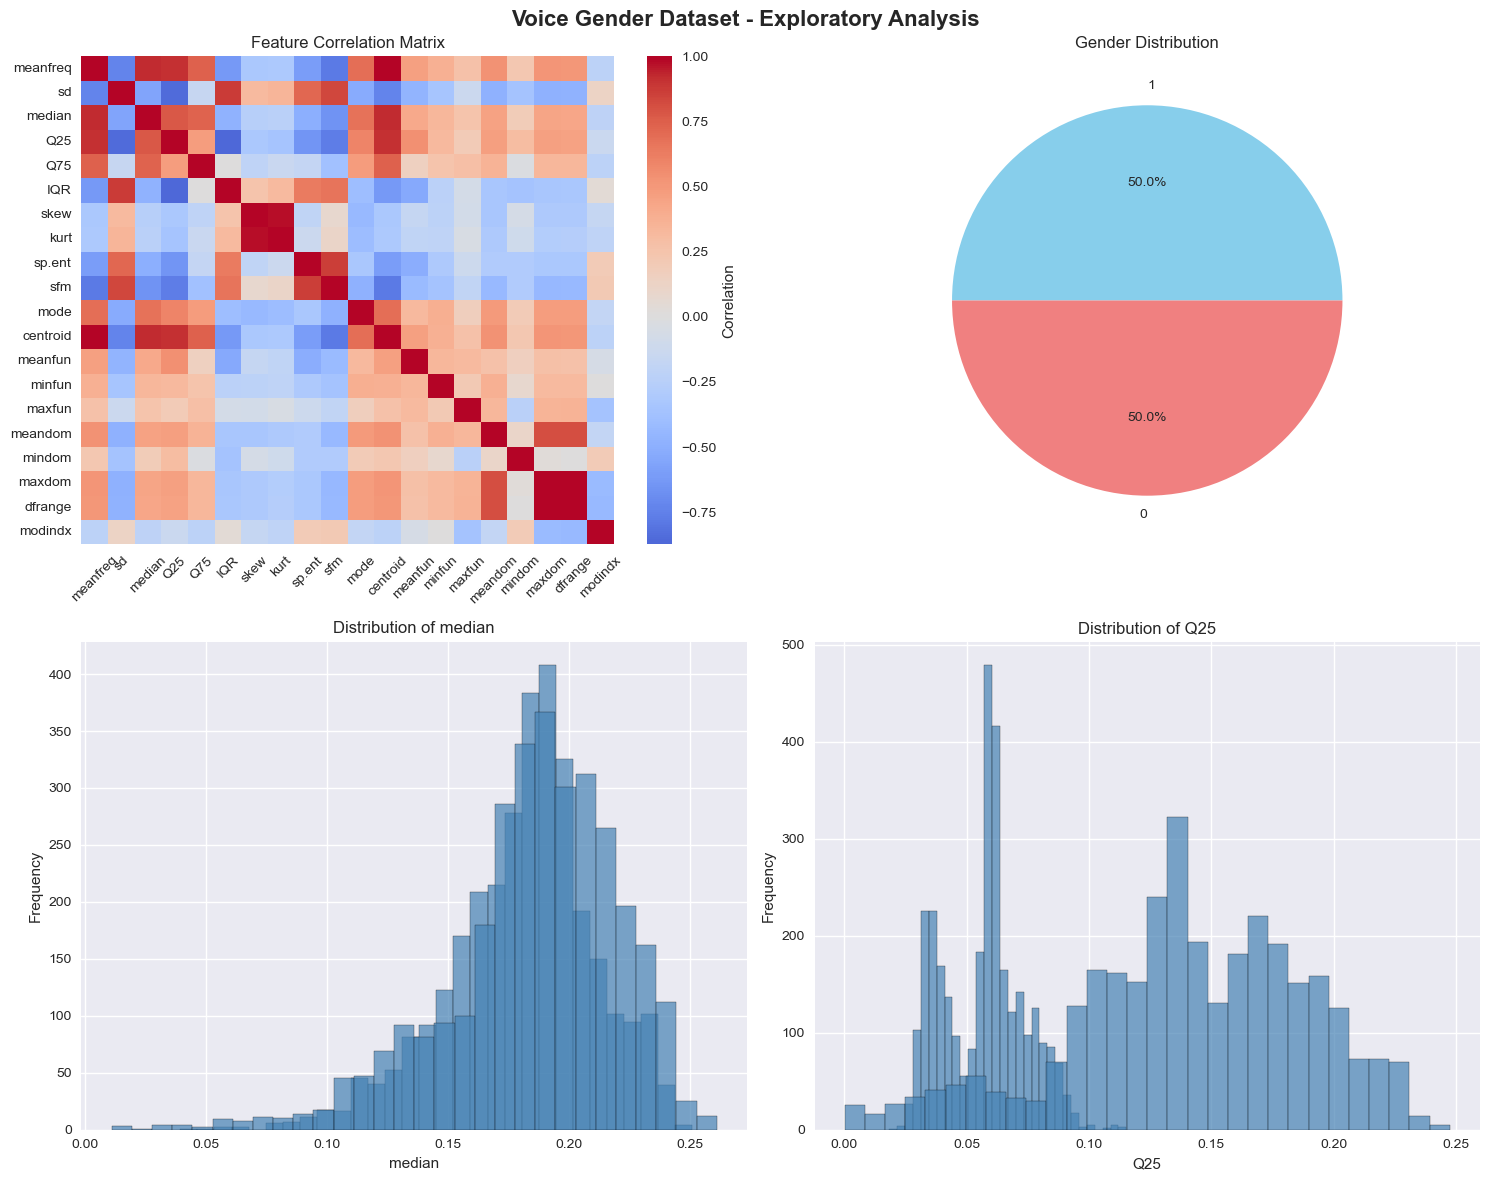


Feature Statistics:
          meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.0145

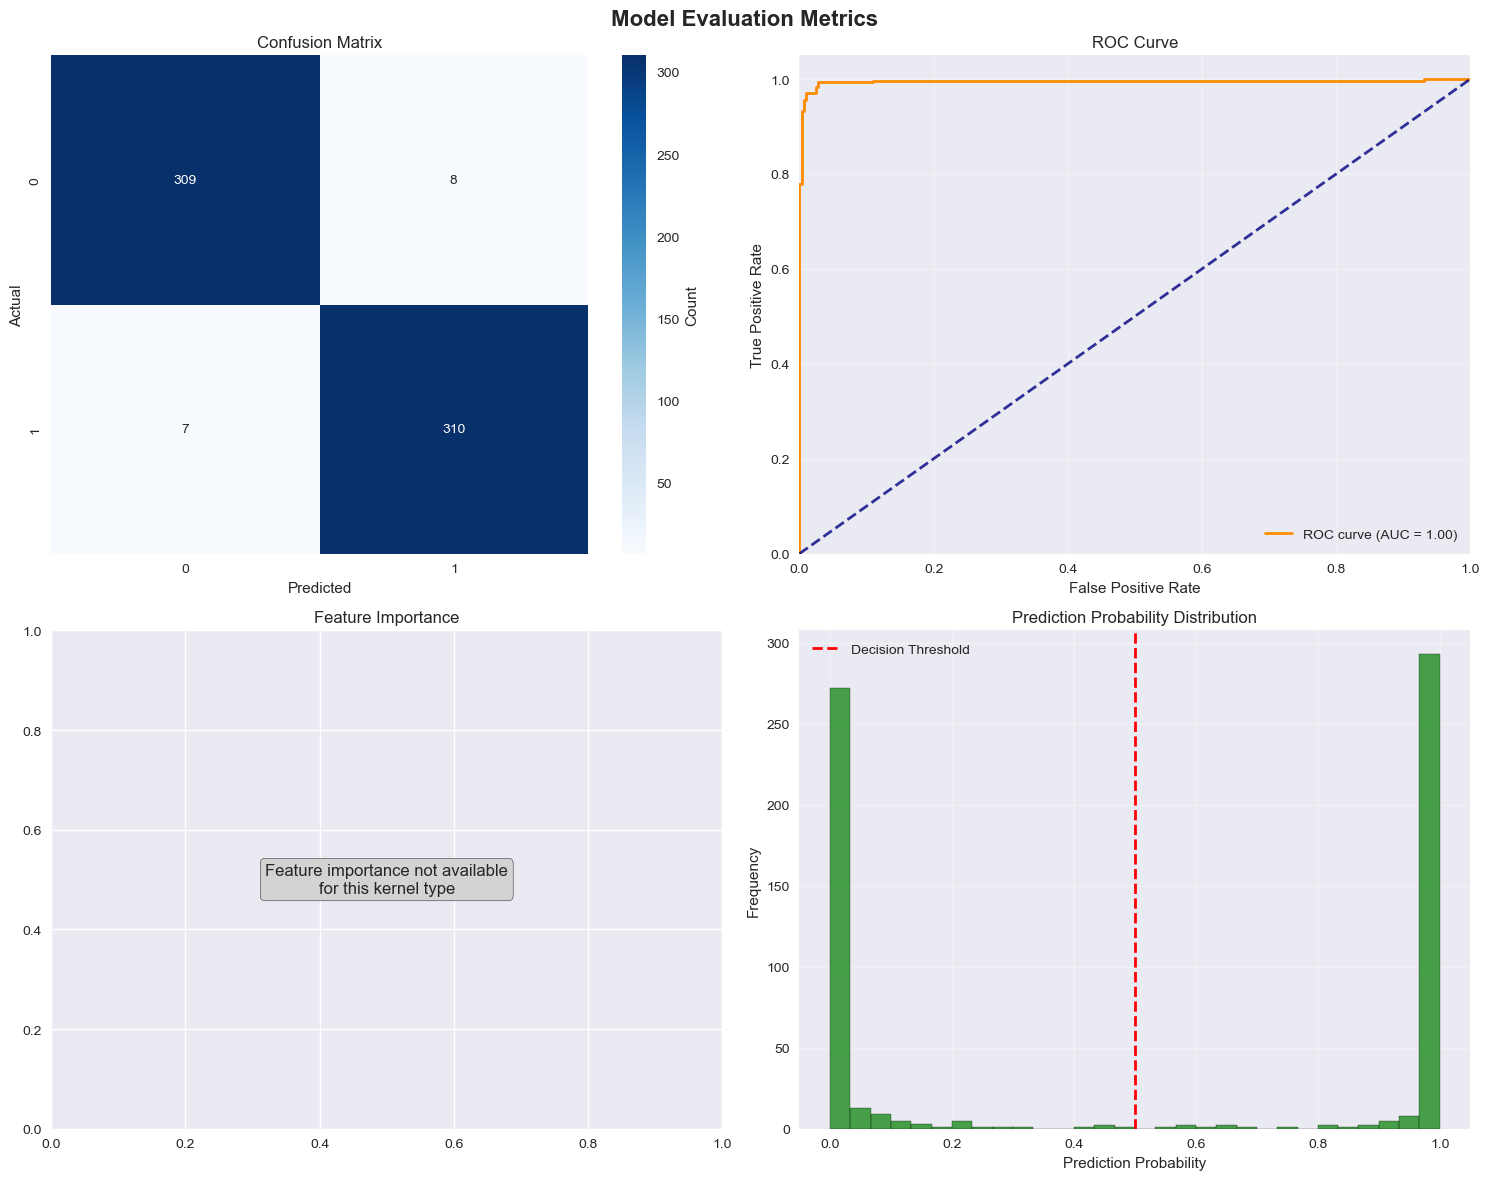


CROSS-VALIDATION RESULTS
Cross-validation scores: [0.93690852 0.96529968 0.98107256 0.98262243 0.93838863]
Mean CV accuracy: 0.9609 (+/- 0.0398)
Cross-validation scores: [0.93690852 0.96529968 0.98107256 0.98262243 0.93838863]
Mean CV accuracy: 0.9609 (+/- 0.0398)


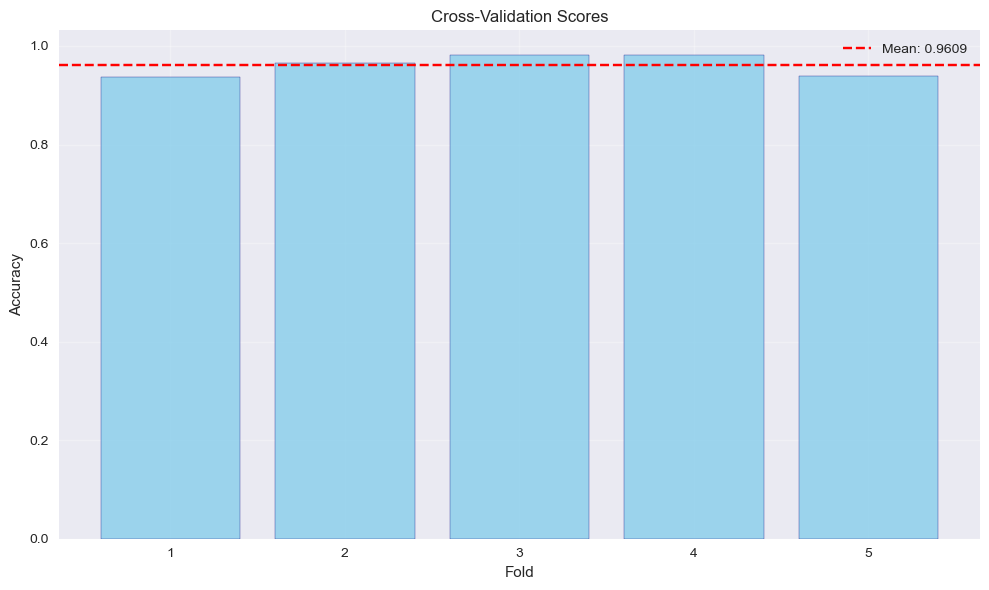


Saving model to voice_gender_svm_model.pkl...
Model saved successfully!

FINAL SUMMARY
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test Accuracy: 0.9763
Cross-validation Mean: 0.9609
Model saved as: voice_gender_svm_model.pkl


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('voice.csv')

# Encode labels
y = LabelEncoder().fit_transform(df['label'])
X = df.drop('label', axis=1)

# Split and scale
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
model = grid.best_estimator_
print('Best Parameters:', grid.best_params_)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Female', 'Male']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
